In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./DummyData/student_question_responses_std.csv')

In [3]:
df

,id,student_id,question_id,result,attempted_at
0,1,223,1,incorrect,2025-01-15T19:15:38.660440
1,2,150,1,correct,2025-01-04T19:15:38.660584
2,3,12,1,correct,2025-01-15T19:15:38.660644
3,4,405,1,correct,2025-01-09T19:15:38.660693
4,5,255,1,incorrect,2025-01-21T19:15:38.660740
...,...,...,...,...,...
1151188,1151189,265,5000,correct,2025-01-04T19:16:38.697639
1151189,1151190,410,5000,correct,2025-01-16T19:16:38.697668
1151190,1151191,179,5000,incorrect,2025-01-10T19:16:38.697696
1151191,1151192,454,5000,incorrect,2025-01-17T19:16:38.697725


In [4]:
df2 = pd.read_csv('./DummyData/question_stats_std.csv')

In [5]:
df2

,question_id,subject,total_attempts,correct_attempts,wrong_attempts,empty_attempts,avg_time_spent,difficulty_score
0,1,Divan Edebiyatı,185,27,104,54,7.884917,354054.054034
1,2,Divan Edebiyatı,194,54,131,9,142.318657,221649.484511
2,3,Divan Edebiyatı,195,46,74,75,281.315085,264102.564095
3,4,Dinamik,298,44,144,110,49.072820,352348.993279
4,5,Divan Edebiyatı,124,40,66,18,145.729226,177419.354829
...,...,...,...,...,...,...,...,...
4995,4996,Türev,279,84,176,19,187.493397,198924.731172
4996,4997,Osmanlı Tarihi,141,21,81,39,137.963760,351063.829777
4997,4998,Divan Edebiyatı,402,141,224,37,141.140424,149253.731327
4998,4999,Organik Kimya,53,26,16,11,227.886579,9433.962263


In [42]:
df2['difficulty_score'] = (df2['correct_attempts'] - df2['wrong_attempts']*0.25)/df2['total_attempts']
df2['difficulty_score'] = 1-df2['difficulty_score']

In [43]:
df2

,question_id,subject,total_attempts,correct_attempts,wrong_attempts,empty_attempts,avg_time_spent,difficulty_score,cluster,confidence_score
0,1,Divan Edebiyatı,185,27,104,54,7.884917,0.994595,6,1.081196
1,2,Divan Edebiyatı,194,54,131,9,142.318657,0.890464,5,1.091035
2,3,Divan Edebiyatı,195,46,74,75,281.315085,0.858974,5,1.092100
3,4,Dinamik,298,44,144,110,49.072820,0.973154,6,1.179934
4,5,Divan Edebiyatı,124,40,66,18,145.729226,0.810484,4,0.998336
...,...,...,...,...,...,...,...,...,...,...
4995,4996,Türev,279,84,176,19,187.493397,0.856631,5,1.166290
4996,4997,Osmanlı Tarihi,141,21,81,39,137.963760,0.994681,6,1.024946
4997,4998,Divan Edebiyatı,402,141,224,37,141.140424,0.788557,4,1.241935
4998,4999,Organik Kimya,53,26,16,11,227.886579,0.584906,1,0.822294


In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Kullanılacak özellikler
X = df2[["difficulty_score"]]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
df2["cluster"] = kmeans.fit_predict(X_scaled)

print(df2)

      question_id          subject  total_attempts  correct_attempts  \
0               1  Divan Edebiyatı             185                27   
1               2  Divan Edebiyatı             194                54   
2               3  Divan Edebiyatı             195                46   
3               4          Dinamik             298                44   
4               5  Divan Edebiyatı             124                40   
...           ...              ...             ...               ...   
4995         4996            Türev             279                84   
4996         4997   Osmanlı Tarihi             141                21   
4997         4998  Divan Edebiyatı             402               141   
4998         4999    Organik Kimya              53                26   
4999         5000            Türev             434               222   

      wrong_attempts  empty_attempts  avg_time_spent  difficulty_score  \
0                104              54        7.884917         

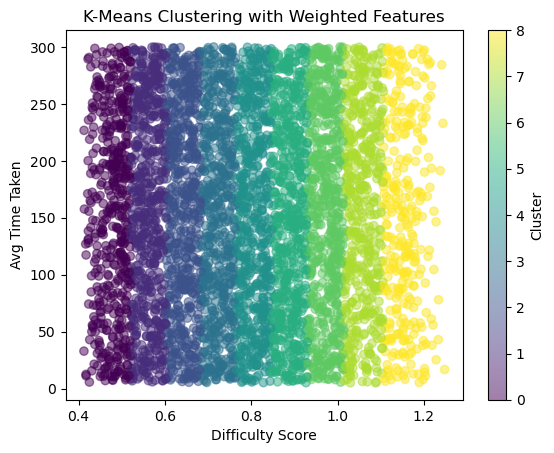

In [83]:
# Küme merkezlerini görselleştirme
plt.scatter(df2["difficulty_score"], df2["avg_time_spent"], c=df2["cluster"], cmap="viridis", alpha=0.5)
plt.xlabel("Difficulty Score")
plt.ylabel("Avg Time Taken")
plt.title("K-Means Clustering with Weighted Features")
plt.colorbar(label="Cluster")
plt.show()


In [45]:
df2.loc[df2['cluster'] == 1]['difficulty_score'].mean()

0.47870588550101906

In [46]:
cluster_difficulty_means = df2.groupby("cluster")["difficulty_score"].mean()

# Ortalamalara göre küçükten büyüğe sıralama yap ve yeni cluster numaralarını oluştur
sorted_clusters = cluster_difficulty_means.sort_values().index
new_cluster_mapping = {old: new for new, old in enumerate(sorted_clusters)}

# Yeni cluster numaralarını dataframe'e uygula
df2["cluster"] = df2["cluster"].map(new_cluster_mapping)

df2

,question_id,subject,total_attempts,correct_attempts,wrong_attempts,empty_attempts,avg_time_spent,difficulty_score,cluster,confidence_score
0,1,Divan Edebiyatı,185,27,104,54,7.884917,0.994595,6,1.081196
1,2,Divan Edebiyatı,194,54,131,9,142.318657,0.890464,5,1.091035
2,3,Divan Edebiyatı,195,46,74,75,281.315085,0.858974,5,1.092100
3,4,Dinamik,298,44,144,110,49.072820,0.973154,6,1.179934
4,5,Divan Edebiyatı,124,40,66,18,145.729226,0.810484,4,0.998336
...,...,...,...,...,...,...,...,...,...,...
4995,4996,Türev,279,84,176,19,187.493397,0.856631,5,1.166290
4996,4997,Osmanlı Tarihi,141,21,81,39,137.963760,0.994681,6,1.024946
4997,4998,Divan Edebiyatı,402,141,224,37,141.140424,0.788557,4,1.241935
4998,4999,Organik Kimya,53,26,16,11,227.886579,0.584906,1,0.822294


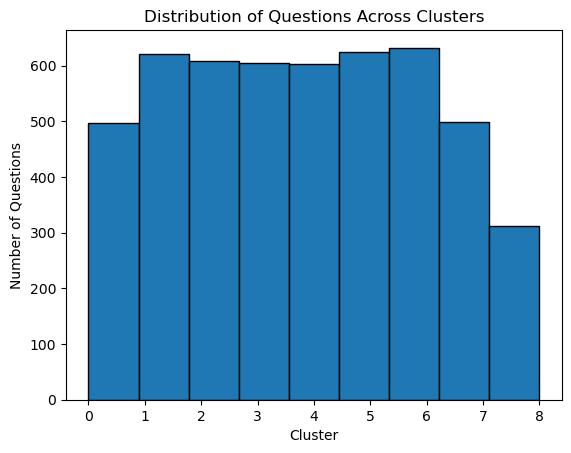

In [78]:
plt.hist(df2["cluster"], bins=9, edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Number of Questions')
plt.title('Distribution of Questions Across Clusters')
plt.show()

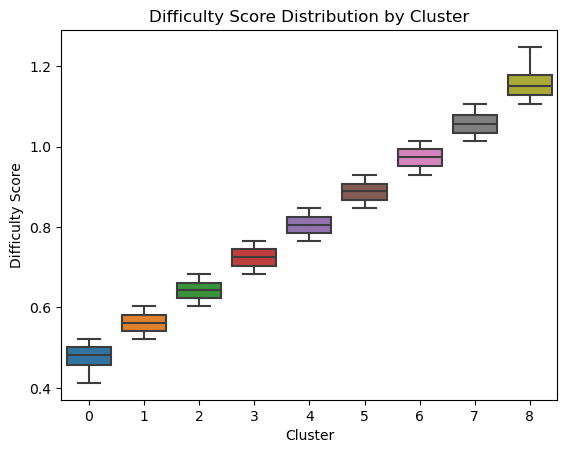

In [79]:
import seaborn as sns

sns.boxplot(x="cluster", y="difficulty_score", data=df2)
plt.xlabel('Cluster')
plt.ylabel('Difficulty Score')
plt.title('Difficulty Score Distribution by Cluster')
plt.show()

In [80]:
def calculate_confidence_score(total_attempts):
    return min(math.log(total_attempts, 5) / 3, 1)

print(calculate_confidence_score(130))

1


In [48]:
df2["confidence_score"] = df2["total_attempts"].apply(calculate_confidence_score)
df2

,question_id,subject,total_attempts,correct_attempts,wrong_attempts,empty_attempts,avg_time_spent,difficulty_score,cluster,confidence_score
0,1,Divan Edebiyatı,185,27,104,54,7.884917,0.994595,6,1.081196
1,2,Divan Edebiyatı,194,54,131,9,142.318657,0.890464,5,1.091035
2,3,Divan Edebiyatı,195,46,74,75,281.315085,0.858974,5,1.092100
3,4,Dinamik,298,44,144,110,49.072820,0.973154,6,1.179934
4,5,Divan Edebiyatı,124,40,66,18,145.729226,0.810484,4,0.998336
...,...,...,...,...,...,...,...,...,...,...
4995,4996,Türev,279,84,176,19,187.493397,0.856631,5,1.166290
4996,4997,Osmanlı Tarihi,141,21,81,39,137.963760,0.994681,6,1.024946
4997,4998,Divan Edebiyatı,402,141,224,37,141.140424,0.788557,4,1.241935
4998,4999,Organik Kimya,53,26,16,11,227.886579,0.584906,1,0.822294


In [49]:
df_merged = df.merge(df2[["question_id", "cluster", "confidence_score"]], on="question_id", how="left")
df_merged

,id,student_id,question_id,result,attempted_at,cluster,confidence_score
0,1,223,1,incorrect,2025-01-15T19:15:38.660440,6,1.081196
1,2,150,1,correct,2025-01-04T19:15:38.660584,6,1.081196
2,3,12,1,correct,2025-01-15T19:15:38.660644,6,1.081196
3,4,405,1,correct,2025-01-09T19:15:38.660693,6,1.081196
4,5,255,1,incorrect,2025-01-21T19:15:38.660740,6,1.081196
...,...,...,...,...,...,...,...
1151188,1151189,265,5000,correct,2025-01-04T19:16:38.697639,1,1.257798
1151189,1151190,410,5000,correct,2025-01-16T19:16:38.697668,1,1.257798
1151190,1151191,179,5000,incorrect,2025-01-10T19:16:38.697696,1,1.257798
1151191,1151192,454,5000,incorrect,2025-01-17T19:16:38.697725,1,1.257798


In [75]:
# Puan hesaplama fonksiyonu
def calculate_score(row):
    if row["result"] == 'incorrect':
        score = (8 - row["cluster"]) * (-0.25)
    elif row["result"] == 'skipped':
        score = (8 - row["cluster"]) * (0)
    elif row["result"] == 'correct':
        score = row["cluster"] * 1

    # score = score / (2**row['attempt']) if score > 0 else score * (2**row['attempt'])
    score = score * (row['confidence_score'] if row['confidence_score'] > 0 else 0)
    
    return score

# Yeni sütun olarak puanı ekleme
df_merged["score"] = df_merged.apply(calculate_score, axis=1)

# Öğrencinin ortalama puanını hesaplama
student_scores = df_merged.groupby(["student_id", "cluster"])["score"].mean().reset_index().groupby('student_id')['score'].mean().reset_index()

In [76]:
student_scores

,student_id,score
0,1,1.146721
1,2,1.012127
2,3,1.026358
3,4,1.192925
4,5,1.083894
...,...,...
495,496,1.140893
496,497,1.115520
497,498,1.191295
498,499,1.119980


In [77]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Gaussian normalizasyonu (Z-score)
mean_score = student_scores["score"].mean()
std_score = student_scores["score"].std()
student_scores["z_score"] = (student_scores["score"] - mean_score) / std_score

# Gaussian dağılıma göre percentiller belirleyerek 9 sınıfa ayırma
percentiles = np.linspace(0, 1, 10)  # 0'dan 1'e kadar 9 aralık oluştur
thresholds = norm.ppf(percentiles)  # Gaussian dağılıma göre threshold'lar

# Her öğrencinin hangi sınıfa düştüğünü belirleme
student_scores["class"] = np.digitize(student_scores["z_score"], bins=thresholds) - 1  # 0'dan başlatmak için

# Sonuçları görüntüleme
student_scores.to_csv('student_scores.csv')